In [1]:
#The magic starts here!
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#! pip install --upgrade seaborn

In [3]:
# IMPORT LIBS

In [4]:
import MDAnalysis
from MDAnalysis.analysis.dihedrals import Dihedral
import os as os
from numpy.linalg import norm
import math
import pandas as pd
import seaborn as sns


In [5]:
#print(sns.__version__)

In [6]:
#!pip install --upgrade seaborn

In [7]:
# for output saving the trajectories. But.. maybe we do not even need to save them. 

#out_root_path='/'
#trajectories_out_path='%s/trajectoriesCOM_K13/'%out_root_path

#if not os.path.isdir(trajectories_out_path):
#    print ("Generating out dir", trajectories_out_path)
#    os.mkdir(trajectories_out_path)

In [8]:
trajectories_path='/Users/fatima/Stanford/70S/Trajectories/ALL/Within15CompleteTunnel/cat_rename_trajs/'
ref_struct_path='/Users/fatima/Stanford/70S/Trajectories/ALL/Within15CompleteTunnel/cat_rename_trajs/'

In [9]:
run=0

systdict={0:'K13', 1:'N13', 2:'WT'}

traj=trajectories_path+"run%d.xtc" % run
ref_struct=ref_struct_path+"top%d.pdb" % run
u=MDAnalysis.Universe(ref_struct, traj)


In [10]:
U2609_SIDE= u.select_atoms("(name N1 or name C6 or name C5 or name C4 or name N3 or name C2) and (resname U and resid 2609)")
HIS22_SIDE= u.select_atoms("(name CG or name ND1 or name CE1 or name NE2 or name CD2) and (resname HIS and resid 22)")

In [11]:
def calc_per100_stacking_his22(sidechain1, sidechain2):
    """Determine if stacking is present based on dihedrals and distances
    Input, 2 sidechains, loaded from MDAnalysis 
    This function is poorly written, and has hard-coded the dihedral angle 0_-
    Need to fix this function, to include traj information as well"""
    
    counter_p=0

    for ts in u.trajectory:
        #Let's first get the distance 
    
        A = sidechain1.center_of_mass()
        B = sidechain2.center_of_mass()
        dist=norm(A - B)
    
        #And let's get the angle in degrees
        #Note these are hard-coded 0_0 
    
        a1 = u.select_atoms("name N1 and resname U and resid 2609").positions
        a2 = u.select_atoms("name N3 and resname U and resid 2609").positions
        a3 = u.select_atoms("name C5 and resname U and resid 2609").positions
        a4 = u.select_atoms("name CG and resname HIS and resid 22").positions
        R=MDAnalysis.lib.distances.calc_dihedrals(a1, a2, a3, a4)
        degs=degrees(R)
    
        # Now, let's do the test 
    
        if degs <= 110 and degs >= 70:
            if dist<=5.0:
                counter_p +=1
    
    print("Stacking %: "+ str((counter_p/u.trajectory.n_frames)*100))
    

    

In [12]:
#calc_per100_stacking_his22(U2609_SIDE,HIS22_SIDE)

# NEXT TO DO:

Do this for the the arginine. Determine which atoms I want for the stacking 0_0 
How are we defining stacking then? 

Put together table of min-dist, h-bond, stacking 

There we will see that betwen h-bond and stacking, the interaction between HIS22 and U2609 may be doing something. 


Also for tomorrow. Bring back the RMSD analysis. 0_0 


In [13]:
# create an Empty pandas DataFrame with column names
df = pd.DataFrame(columns = ['COM Dist', 'Dih Angle'])


In [14]:
for ts in u.trajectory:
        #Let's first get the distance 
    
        A = U2609_SIDE.center_of_mass()
        B = HIS22_SIDE.center_of_mass()
        dist=norm(A - B)
        
        a1 = u.select_atoms("name N1 and resname U and resid 2609").positions
        a2 = u.select_atoms("name N3 and resname U and resid 2609").positions
        a3 = u.select_atoms("name C5 and resname U and resid 2609").positions
        a4 = u.select_atoms("name CG and resname HIS and resid 22").positions
        R=MDAnalysis.lib.distances.calc_dihedrals(a1, a2, a3, a4)
        degs=degrees(R)
        
        df=df.append({'COM Dist (Å)' : dist, 'Dih Angle (degrees)' : degs[0]}, ignore_index = True)
        
        
        

[Text(0.5, 1.0, 'K13')]

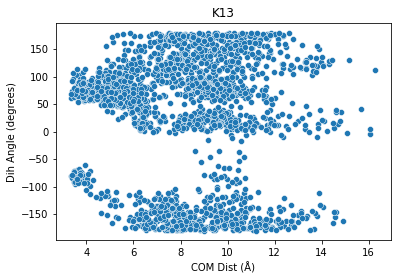

In [15]:
sns.scatterplot(x="COM Dist (Å)",
                    y="Dih Angle (degrees)",
                    data=df).set(title=systdict[run])

/var/folders/2k/svnk000j3vd6sklcnmmjjc5h0000gn/T/ipykernel_47011/4204666746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["COM Dist (Å)"]).set(title=systdict[run])


(0.0, 20.0)

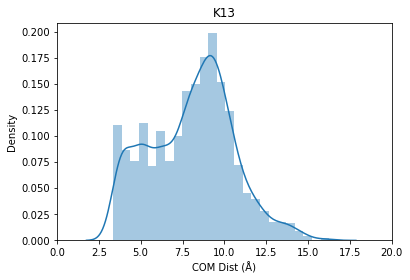

In [16]:
sns.distplot(df["COM Dist (Å)"]).set(title=systdict[run])
plt.xlim(0, 20)

/var/folders/2k/svnk000j3vd6sklcnmmjjc5h0000gn/T/ipykernel_47011/2604980722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["COM Dist (Å)"]).set(title=systdict[run])


[Text(0.5, 1.0, 'K13')]

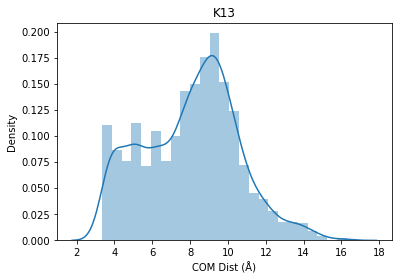

In [17]:
sns.distplot(df["COM Dist (Å)"]).set(title=systdict[run])

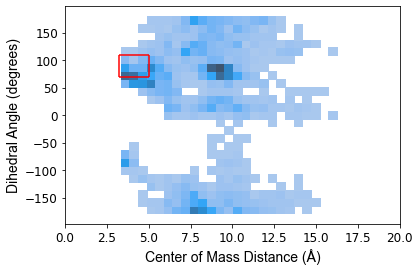

In [18]:
sns.histplot(df, x="COM Dist (Å)",
                    y="Dih Angle (degrees)")#.set(title=systdict[run])


#plt.axvline(5, color='r')
#plt.axhline(70, color='r')
#plt.axhline(110, color='r')

plt.vlines(5, 70, 110, colors='r')
plt.vlines(3.2, 70, 110, colors='r')

plt.hlines(70, 3.2, 5, colors='r')
plt.hlines(110, 3.2, 5, colors='r')

plt.xlim(0, 20)

#plt.hlines(3.2, 70, 110, colors='r')

#print(graph)

plt.xlabel('Center of Mass Distance (Å)',fontsize=14, fontname='Arial')
plt.ylabel('Dihedral Angle (degrees)',fontsize=14, fontname='Arial')

plt.tick_params(axis='both', which='major', labelsize=12)

#graph.axvline(5)
#plt.show()

plt.savefig('/Users/fatima/Stanford/WritingSecM/PLOTS_STACKING_H22_2609_FEB2024/%s.png' % systdict[run], 
            dpi=300, bbox_inches='tight')

plt.show()